In [1]:
from JupyterImport import *
from src.DataStandardize.ExpSpecific.Sep20 import Fixes
root_logger.setLevel(logging.WARNING)
import copy
from src.Scripts.SquareWaveAnalysis import avg_transition_sw


In [19]:
[DatHandler.remove_dat(dat.datnum, 'base') for dat in dats];

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [2]:

# dats = get_dats((7468, 7470+1), overwrite=True)  # EXTREMETLY slow sweeping (1.3mV/s LP*200) trying to match Mar19 data

# dats = get_dats((7472, 7488+1))  # Theta vs HQPC bias  --> See Oct16_DCbias

# dats = get_dats((7489, 7492+1))  # 4 Positions along transition into gamma broadened
# dats.extend(get_dats((7599, 7601+1)))  # 3x weakly coupled position (trying to get better averaged entropy signal)
# dats.extend(get_dats((7690, 7692+1)))  # 3x Even more gamma broadened
# dats.extend(get_dats((7716, 7718+1)))  # 3x weakly coupled again, slightly offset from previous

# dats = get_dats((7493, 7574+1))  # 2 Sets along S shape in fine steps (right side only)
# dats.extend(get_dats((7602, 7683+1)))  # 2 Sets along S shape in fine steps (left side slightly overlapping with right)

dats = get_dats((7719, 7764+1))  # Stability testing... First 21 are initial stability, then in 3s after that with increasing step sizes (out and back) then 9 without moving.. and repeat

for dat in dats:
    Fixes.fix_magy(dat)
    
dat_dict = {dat.datnum: dat for dat in dats}

100% (46 of 46) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


## Set up default fitting parameters, and use this to fit all/weakly coupled data

In [242]:
filt_name = 'LCT/0.16'
filt_threshold = -200/0.16 
filt_val = lambda dat: dat.Logs.fds['LCT/0.16']
filt_func = lambda dat: filt_val(dat) > filt_threshold  # Returns True if dat pair is gamma broadened (or starting to be gamma broadened)

In [243]:
analysis_params = EA.EA_params(bin_data=False, num_per_row=500,
                               sub_const=True, sub_const_range=(-350, -250),
                               sub_line=False, sub_line_range=(-4000, -600),
                               int_entropy_range=(250, 350),
                               allowed_amp_range=(0.1,1.601), default_amp=0.908,
                               allowed_dT_range=(0.001, 30.002), default_dT=2.415,
                               CT_fit_range=(-500, 500), CT_fit_func='i_sense', CT_fit_param_edit_kwargs={},
                               fit_param_edit_kwargs=dict(),
                               E_fit_range=(-500, 500), 
                               calculate_uncertainty=True, 
                               batch_uncertainty=5,
                               center_data=True)

# analysis_params = EA.EA_params(bin_data=False, num_per_row=500,
#                                sub_const=True, sub_const_range=(-350, -250),
#                                sub_line=False, sub_line_range=(-4000, -600),
#                                int_entropy_range=(250, 350),
#                                allowed_amp_range=(0.1,.601), default_amp=0.889,
#                                allowed_dT_range=(0.001, 0.002), default_dT=2.562,
#                                CT_fit_range=(-400, 400), CT_fit_func='i_sense_digamma', CT_fit_param_edit_kwargs=dict(param_name=['theta'], value=[22.1], vary=[False]),
#                                fit_param_edit_kwargs=dict(),
#                                E_fit_range=(-400, 400), 
#                                calculate_uncertainty=True, 
#                                batch_uncertainty=5,
#                                center_data=True)

In [13]:
EA.standard_square_process(dats[0], analysis_params)

D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\Scripts\SquareEntropyAnalysis.py:537: RuntimeWarning:

Mean of empty slice

D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\Scripts\SquareEntropyAnalysis.py:140: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



In [244]:
recalculate = False

for dat in progressbar(dats):
    if (recalculate or not hasattr(dat.Other, 'EA_values')) and not filt_func(dat):
        EA.standard_square_process(dat, analysis_params)

N/A% (0 of 46) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--WARNING:src.DatObject.Attributes.Transition:LinAlgError encountered, retrying
D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\Scripts\SquareEntropyAnalysis.py:536: RuntimeWarning:

Mean of empty slice

  2% (1 of 46) |                         | Elapsed Time: 0:00:00 ETA:   0:00:18WARNING:src.DatObject.Attributes.Transition:LinAlgError encountered, retrying
  4% (2 of 46) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:17WARNING:src.DatObject.Attributes.Transition:LinAlgError encountered, retrying
 39% (18 of 46) |#########               | Elapsed Time: 0:00:07 ETA:   0:00:10D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\DatObject\Attributes\Entropy.py:18: RuntimeWarning:

overflow encountered in cosh

 95% (44 of 46) |######################  | Elapsed Time: 0:00:17 ETA:   0:00:00WARNING:src.DatObject.Attributes.Transition:LinAlgError encountered, retrying
 97% (45 of 46) |#############

## Fit Dats that are Gamma broadened using some fixed values determined from weakly coupled

Filter the dats to get only dats that are gamma broadened (or whatever the filter is)

Set up some new fixed parameters

In [6]:
gamma_analysis_params = copy.copy(analysis_params)
gamma_analysis_params.sub_const=True
# gamma_analysis_params.sub_const_range=(-350, -250) # Set per data based on gamma value (might require processing twice)
# gamma_analysis_params.int_entropy_range = (350, 450) # Set per data "" "" 

gamma_analysis_params.allowed_amp_range = (0,10.01)
# gamma_analysis_params.default_amp = 0.949
gamma_analysis_params.allowed_dT_range = (1,1.01)
# gamma_analysis_params.default_dT = 2.470

gamma_analysis_params.CT_fit_func = 'i_sense_digamma'
gamma_analysis_params.CT_fit_param_edit_kwargs = {'param_name': ['theta'], 'value': [21.1], 'vary': [False]}

In [7]:
recalculate = True 
for dat in progressbar(dats):
    if (recalculate or not hasattr(dat.Other, 'EA_values')) and filt_func([dat]):
        if (vs:= getattr(dat.Other, 'EA_values', None)) is not None and not np.isnan(vs.g):
#             w = 250+3*vs.g
            w = 500
        else:
            gamma_analysis_params.calculate_uncertainty = False  # Speed up prelim calcs
            EA.standard_square_process(dat, gamma_analysis_params)  # Run once just for the i_sense_digamma fit
            gamma_analysis_params.calculate_uncertainty = True
            g = dat.Other.EA_values.g  # This should now exist having run processing already
#             w = 250+3*g
            w = 500
        gamma_analysis_params.sub_const_range = (-100-w, -w)
        gamma_analysis_params.int_entropy_range = (w, w+100)
        
        EA.standard_square_process(dat, gamma_analysis_params)


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--WARNING:src.DatObject.Attributes.Transition:LinAlgError encountered, retrying
D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\Scripts\SquareEntropyAnalysis.py:140: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

 28% (2 of 7) |#######                   | Elapsed Time: 0:00:03 ETA:   0:00:08D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\Scripts\SquareEntropyAnalysis.py:579: RuntimeWarning:

Mean of empty slice

D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\Scripts\SquareEntropyAnalysis.py:601: RuntimeWarning:

Mean of empty slice

100% (7 of 7) |##########################| Elapsed Time: 0:00:15 Time:  0:00:15


In [215]:
# For looking at the 5 positions along transition ONLY

ap = copy.copy(analysis_params)
ap.CT_fit_func = 'i_sense_digamma'
ap.CT_fit_param_edit_kwargs = {'param_name': ['theta'], 'value': [21.1], 'vary': [False]}
ap.CT_fit_range = (-600, 600)
ap.allowed_amp_range = (0, 0.01)
ap.allowed_dT_range = (0, 0.01)
ap.default_dT = 2.415

# Rebuiling list of dats
dats = get_dats((7489, 7492+1))  # 4 Positions along transition into gamma broadened
dats.extend(get_dats((7599, 7601+1)))  # 3x weakly coupled position (trying to get better averaged entropy signal)
dats.extend(get_dats((7690, 7692+1)))  # 3x Even more gamma broadened
dats.extend(get_dats((7716, 7718+1)))  # 3x weakly coupled again, slightly offset from previous

dd = {dat.datnum: dat for dat in dats}
dats = list()

## Weakly coupled 
ds = [dd[num] for num in [7489, 7599, 7600, 7601]]
merged_data = EA.EA_data()
merged_data.x = ds[0].SquareEntropy.Processed.outputs.x
merged_data.trans_data = np.nanmean([d.SquareEntropy.Processed.outputs.averaged for d in ds], axis=0)
merged_data.entropy_data = np.nanmean([d.SquareEntropy.Processed.outputs.entropy_signal for d in ds], axis=0)

dat = dd[7489]
ap.default_amp = 0.907
ap.int_entropy_range = (250, 350)
ap.sub_const_range = (-400, -250)
EA.standard_square_process(dat, ap, data=merged_data)  # Uses the passed in data which is really 4 datasets combined
dats.append(dat)    

ds = [dd[num] for num in range(7716, 7718+1)]
merged_data = EA.EA_data()
merged_data.x = ds[0].SquareEntropy.Processed.outputs.x
merged_data.trans_data = np.nanmean([d.SquareEntropy.Processed.outputs.averaged for d in ds], axis=0)
merged_data.entropy_data = np.nanmean([d.SquareEntropy.Processed.outputs.entropy_signal for d in ds], axis=0)

dat = dd[7716]
ap.default_amp = 0.907
ap.allowed_amp_range = (0, 10)
ap.allowed_dT_range = (0, 10)
ap.int_entropy_range = (250, 350)
ap.sub_const_range = (-400, -250)
EA.standard_square_process(dat, ap, data=merged_data)  # Uses the passed in data which is really 4 datasets combined
dats.append(dat)    



ap.default_amp = 0.907


# g ~ 40
d = dd[7490]
# ap.allowed_amp_range = (0, 10.01)
# ap.default_amp = 0.87
ap.int_entropy_range = (400, 600)
ap.sub_const_range = (-600, -400)
EA.standard_square_process(d, ap)
dats.append(d)


# g ~ 85
d = dd[7491]
# ap.allowed_amp_range = (0, 10.01)
# ap.default_amp = 0.865
ap.int_entropy_range = (400, 600)
ap.sub_const_range = (-600, -400)
EA.standard_square_process(d, ap)
dats.append(d)


# g ~ 160
d = dd[7492]
# ap.allowed_amp_range = (0, 10.01)
# ap.default_amp = 0.85
ap.int_entropy_range = (300, 400)
ap.sub_const_range = (-600, -550)
EA.standard_square_process(d, ap)
dats.append(d)


# g ~ ???
ds = [dd[num] for num in range(7690, 7692+1)]
merged_data = EA.EA_data()
merged_data.x = ds[0].SquareEntropy.Processed.outputs.x
merged_data.trans_data = np.nanmean([d.SquareEntropy.Processed.outputs.averaged for d in ds], axis=0)
merged_data.entropy_data = np.nanmean([d.SquareEntropy.Processed.outputs.entropy_signal for d in ds], axis=0)

dat = dd[7691]
# ap.default_amp = 0.907
ap.int_entropy_range = (500, 700)
ap.sub_const_range = (-700, -500)
EA.standard_square_process(dat, ap, data=merged_data)  # Uses the passed in data which is really 3 datasets combined
dats.append(dat)    


100% (4 of 4) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (3 of 3) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (3 of 3) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (3 of 3) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
<ipython-input-215-4f56c74f2b4f>:24: RuntimeWarning:

Mean of empty slice

<ipython-input-215-4f56c74f2b4f>:25: RuntimeWarning:

Mean of empty slice

<ipython-input-215-4f56c74f2b4f>:37: RuntimeWarning:

Mean of empty slice

<ipython-input-215-4f56c74f2b4f>:38: RuntimeWarning:

Mean of empty slice

<ipython-input-215-4f56c74f2b4f>:88: RuntimeWarning:

Mean of empty slice

<ipython-input-215-4f56c74f2b4f>:89: RuntimeWarning:

Mean of empty slice



In [218]:
datas = list()
ds = [dat for dat in dats if dat.datnum in list(range(7489, 7492+1))+[7691, 7716]]
for dat in ds:
    datas.append(dat.Other.EA_values.efit_info.eval_fit(x=dat.Other.Data['x']))
# datas = np.array(datas)
# datas.shape
CU.save_to_mat(datas, [f'Dat{dat.datnum}_entropy_fit' for dat in ds], 'Temp/fits_to_dats_7489_to_7492_and_7691_7716.mat')

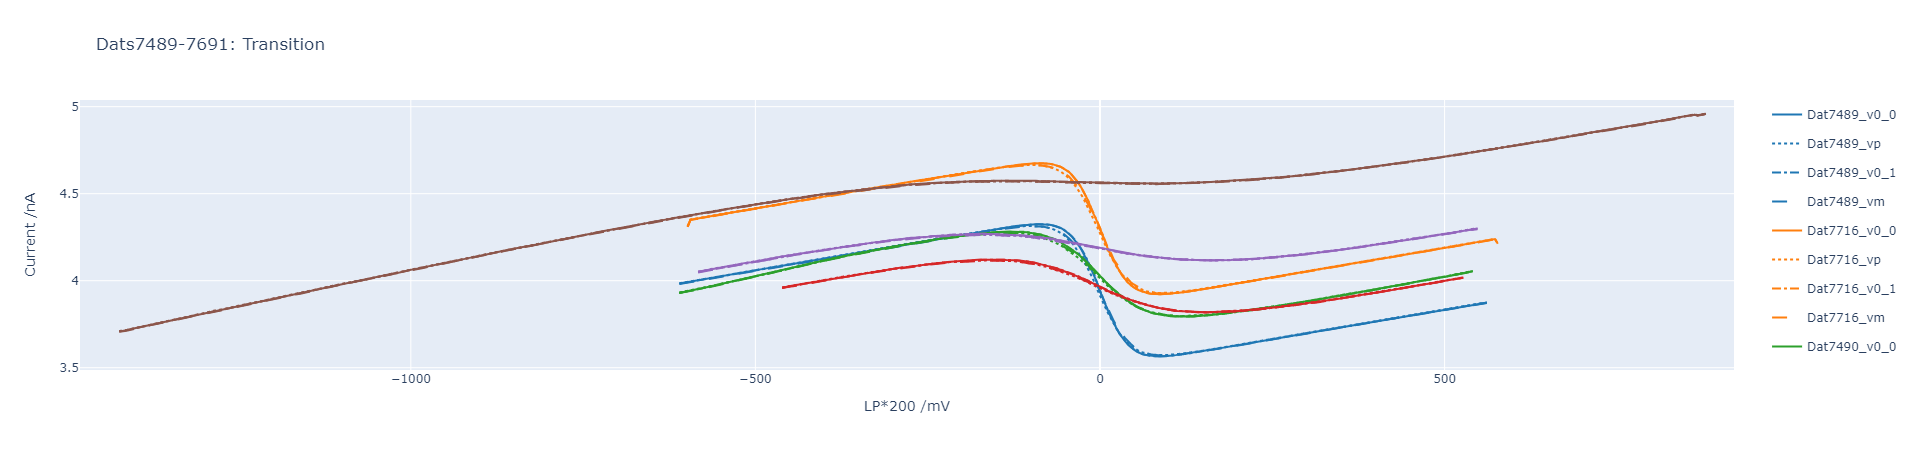

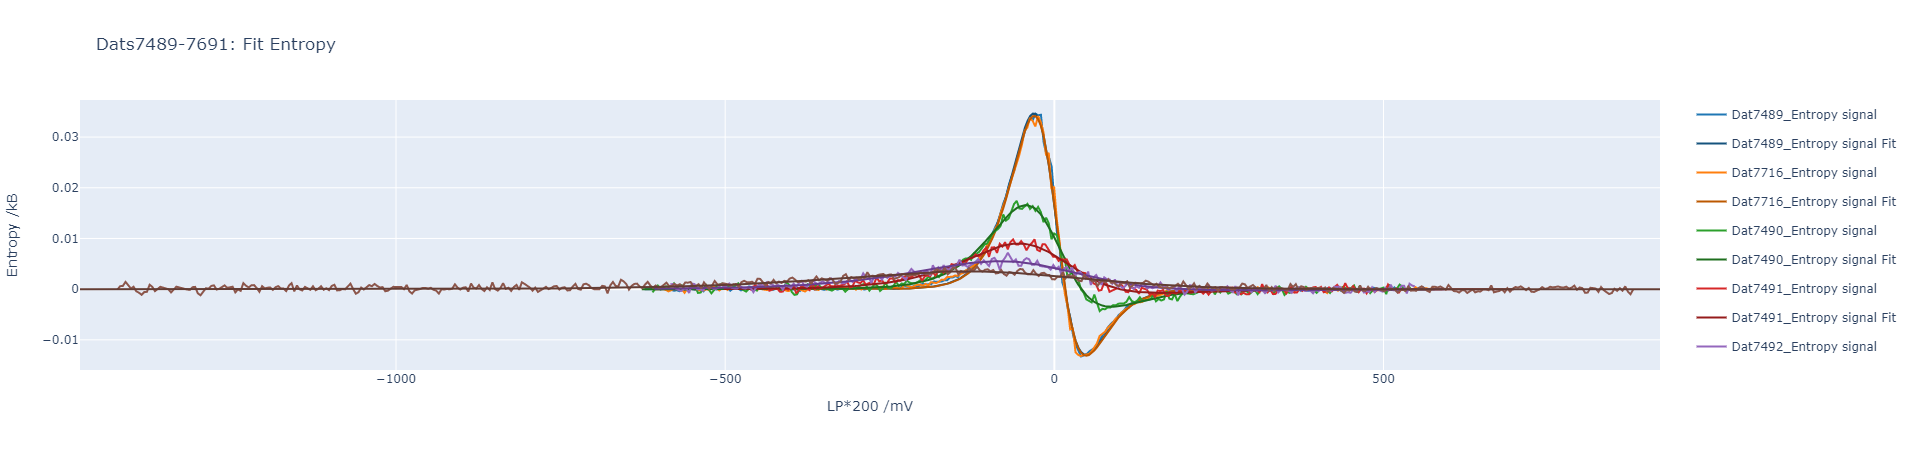

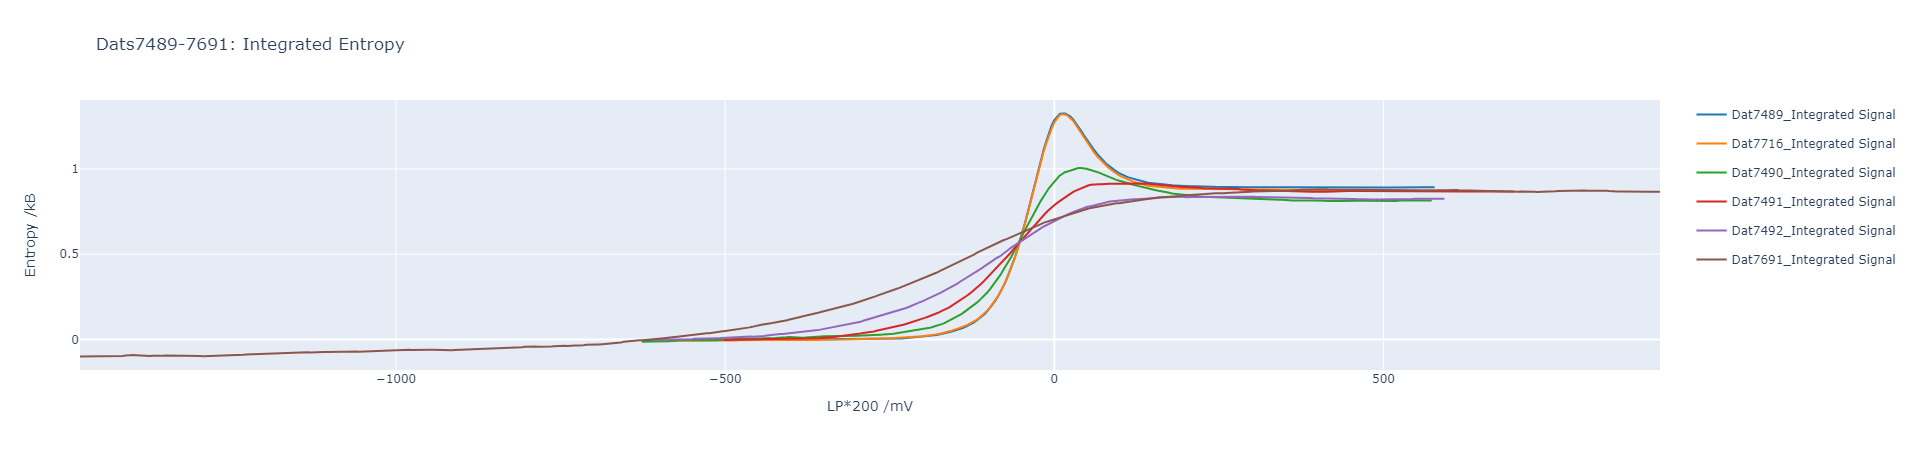

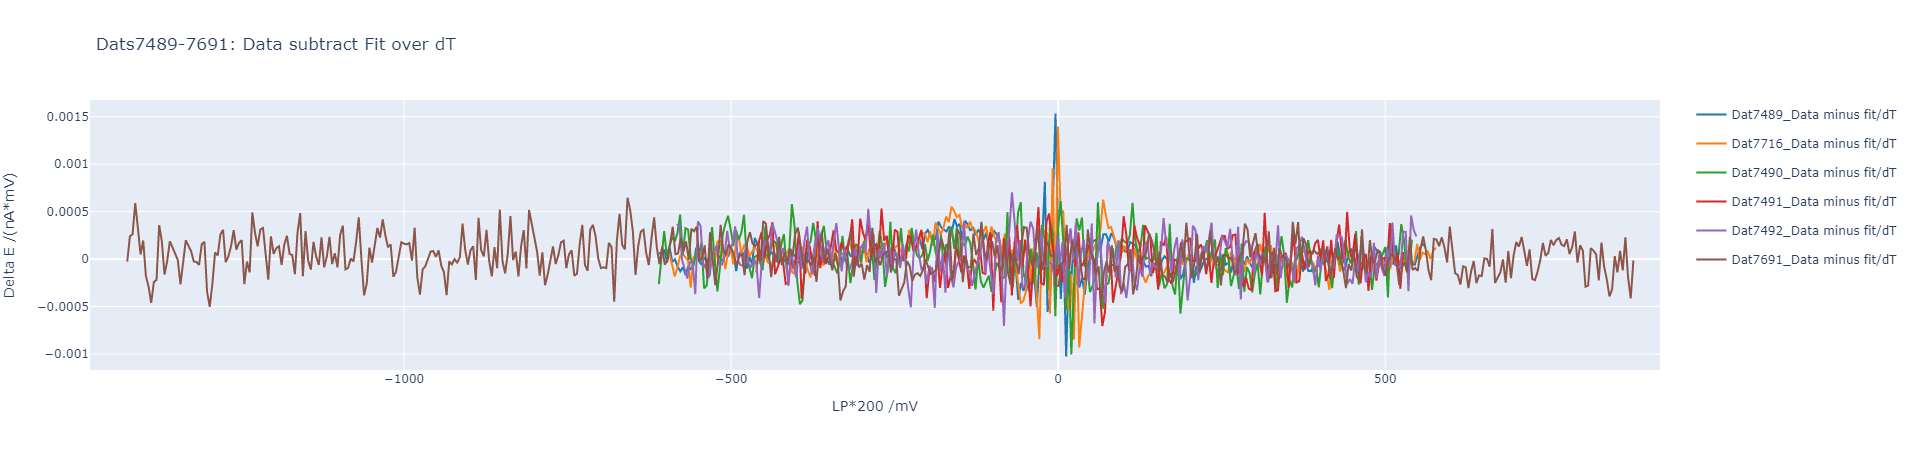

In [211]:
lims = (None, None)
dd = {dat.datnum: dat for dat in dats}
# start = 4893  #4881
start = 6146
single_dat = False
# ds = [dd[num] for num in [start, start+44, start+44*2]]  # 
a = 0
# ds = [dd[num] for num in [6219+a, 6275+a, 6331+a, 6517+a, 6182+a]]
# ds = [dd[num] for num in [7142, 7138, 7167, 7098, 7106, 7144, 7136, 7155, 7222, 7185]]
# ds = [dd[num] for num in [7163, 7128, 7124, 7185]]
# ds = [dd[num] for num in [7338, 7338+23, 7338+23*2]]
# ds = [dd[num] for num in [7078, 7157, 7173, 7185]]  # 4 points that I'm getting better data for Josh talk for
# ds = [dd[num] for num in [6842, 7132]]
# ds = [dd[num] for num in np.arange(start, start+10, 2)]
ds = dats
# ds = [dat for dat in dats if 0.85 < dat.Other.EA_values.int_dS < 0.95]
# ds = [dd[num] for num in np.arange(start, start+37, 4)]  # RCB
# ds = [dd[num] for num in np.arange(start, start+281, 40)]  # field
# ds = [dd[num] for num in np.arange(start, start+41, 8)]  # hqpc

get_additional_data = [lambda dat: dat.Logs.fds['LCT/0.16'],
                       lambda dat: dat.AWG.AWs[0][0][1]/10,
                       lambda dat: dat.Other.EA_values.dT,
                       lambda dat: dat.Other.EA_values.dS,
                       lambda dat: dat.Other.EA_values.int_dS,
                       lambda dat: dat.Logs.fds['LCSS'],
                       lambda dat: dat.Logs.fds['LCB'],
                       lambda dat: dat.AWG.info.measureFreq/dat.AWG.info.wave_len,
                       lambda dat: dat.Logs.fds['LP*2']]
additional_hover_template = '<br>'.join(('<extra>%{fullData.name}', 
                                         'LCT=%{customdata[1]:.1f}mV',
                                         'Bias=%{customdata[2]:.0f}nA',
                                         'dT=%{customdata[3]:.2f}mV',
                                         'dS=%{customdata[4]:.2f}kB',
                                         'int_dS=%{customdata[5]:.2f}kB',
                                         'LCSS=%{customdata[6]:.1f}mV',
                                         'LCB=%{customdata[7]:.1f}mV',
                                         'Freq=%{customdata[8]:.1f}Hz', 
                                         'LP*2=%{customdata[9]:.1f}mV'
                                         '</extra>'))

figt = EA.Plots.waterfall(ds[lims[0]:lims[1]], which='transition', mode='lines', add_fits=False, shift_per=0.0, get_additional_data=get_additional_data, additional_hover_template=additional_hover_template, single_dat=single_dat)
fige = EA.Plots.waterfall(ds[lims[0]:lims[1]], which='entropy', mode='lines', add_fits=True, shift_per=0.00, get_additional_data=get_additional_data, additional_hover_template=additional_hover_template, single_dat=single_dat)
figi = EA.Plots.waterfall(ds[lims[0]:lims[1]], which='integrated', mode='lines', add_fits=False, shift_per=0.0, get_additional_data=get_additional_data, additional_hover_template=additional_hover_template, single_dat=single_dat)
figdmf = EA.Plots.waterfall(ds[lims[0]:lims[1]], which='data_minus_fit_scaled', mode='lines', add_fits=False, shift_per=0.00, get_additional_data=get_additional_data, additional_hover_template=additional_hover_template, single_dat=single_dat)
figs = (figt, fige, figi, figdmf)
# figs = [figi]
for fig in figs:
    title = fig.layout.title.text
    field = ds[0].Logs.magy.field
    bias = ds[0].AWG.AWs[0][0][1]/10
#     fig.update_layout(title=title+f'<br>Field={field:.0f}mT, HQPC Bias={bias:.1f}nA')

for fig in figs:
    fig.show()

In [20]:
names = ('Transition', 'Entropy', 'Integrated Entropy', 'Data minus fit over dT')
save_graph=True
graphs_to_save = [2]
if save_graph:
    for i in graphs_to_save:
        figs[i].write_html(export_path+f'Dats{dats[0].datnum}-{dats[-1].datnum} -- Waterfall plot of {names[i]}.html')

In [39]:
dd[7186]

In [6]:
for dat in dats:
    
    print(dat.datnum, dat.Other.EA_values.g)
EA.EA_values()

7489 0.1221398387338759
7490 39.32654250171635
7491 85.91652634565415
7492 159.5300027613764
7599 -0.20816712867337372
7600 -0.014781535704432969
7601 0.09279974675281366


AttributeError: 'EA_values' object has no attribute 'g'

D:\OneDrive\UBC LAB\GitHub\Python\PyDatAnalysis\src\Scripts\SquareEntropyAnalysis.py:1264: UserWarning:




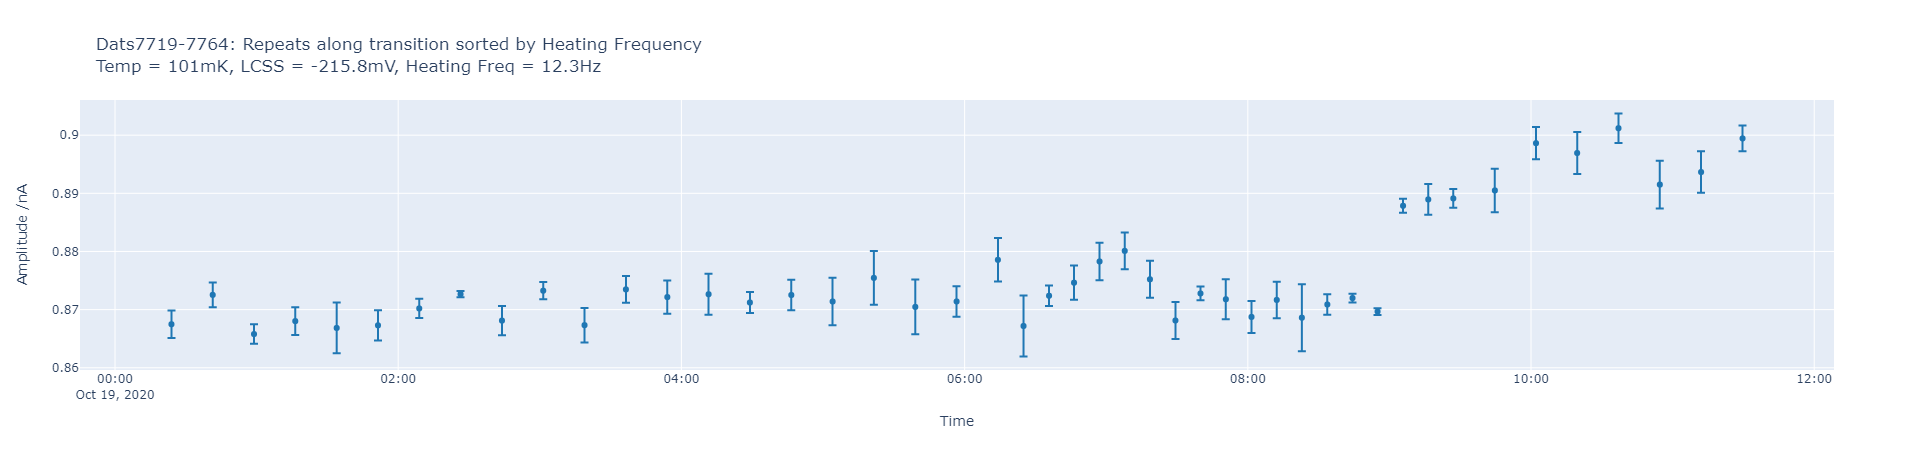

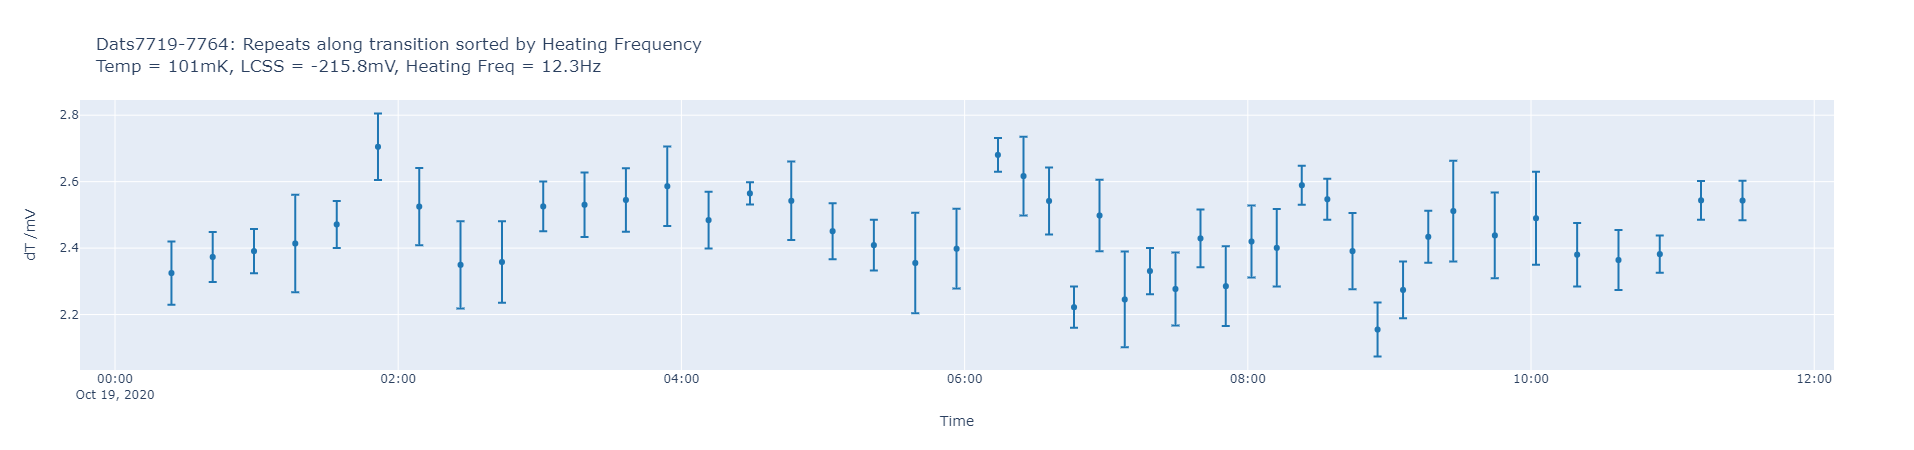

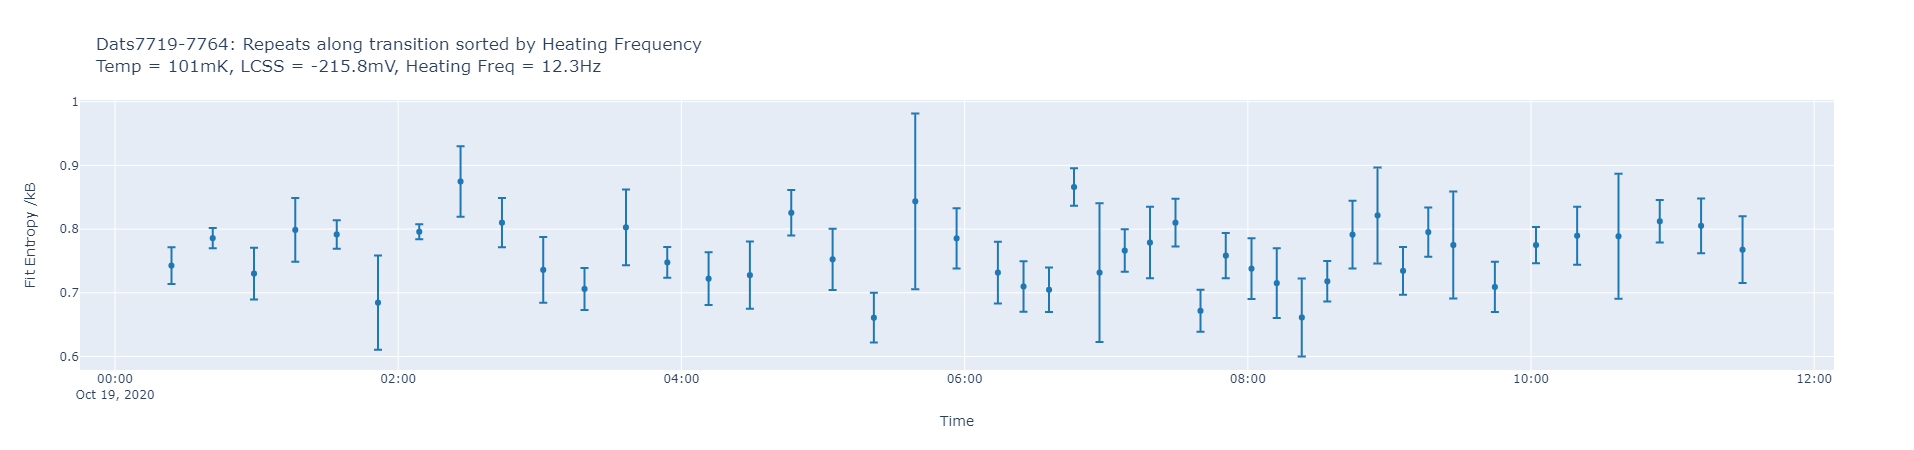

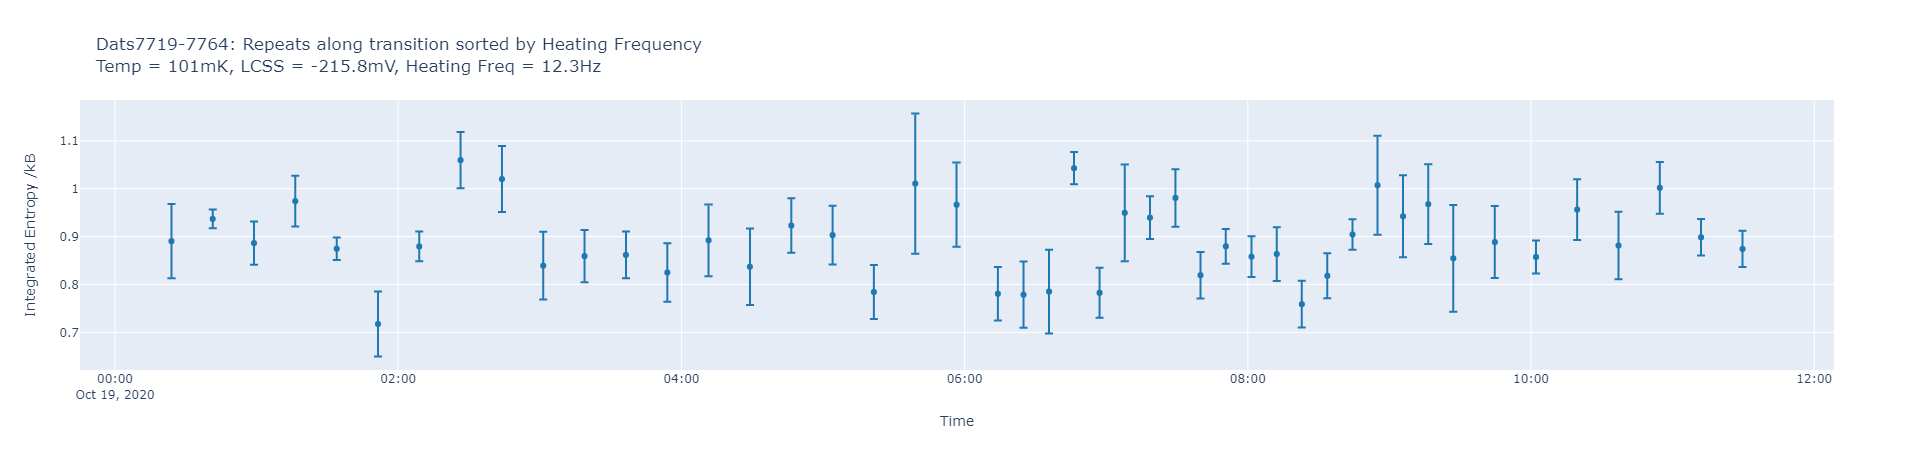

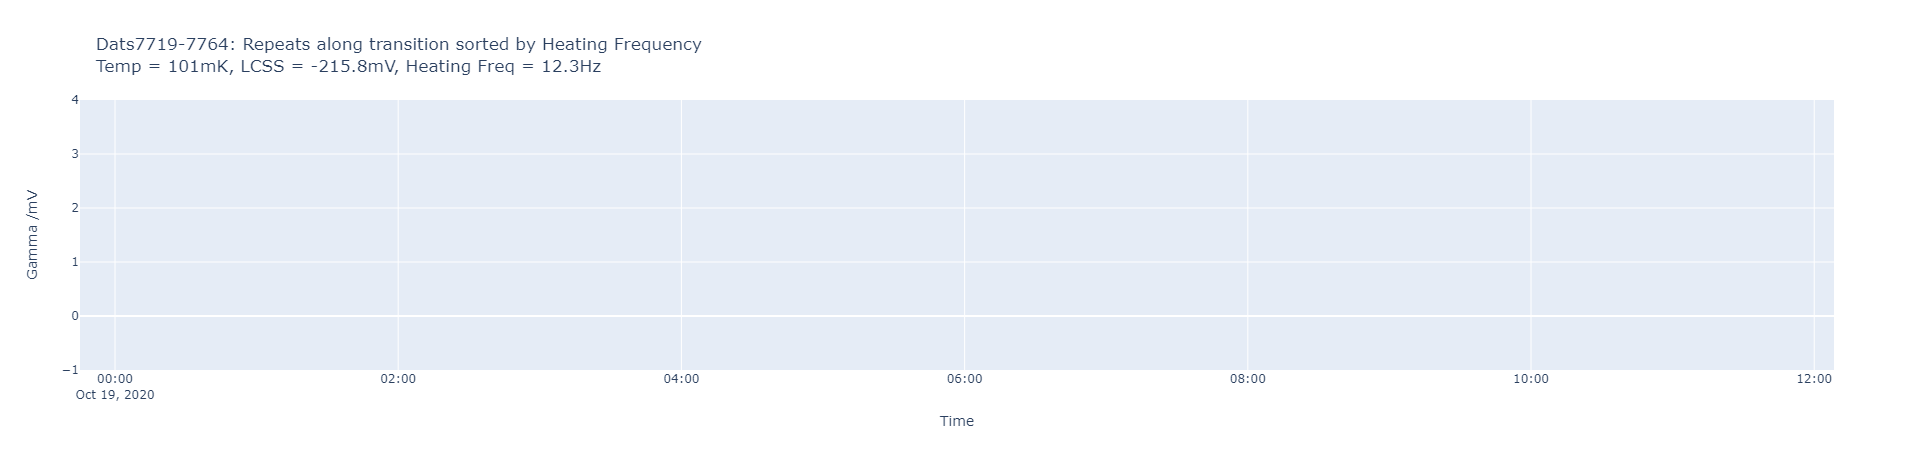

In [246]:
which_sorts = ['freq']*5
tols = [1]*5
which_ys = ['amp', 'dt', 'fit_ds', 'int_ds', 'g']
# which_xs = ['lct/0.16']*5
which_xs = ['time']*5

# which_sorts = ['field']*4
# tols = [10]*4
# which_ys = ['amp', 'dt', 'fit_ds', 'int_ds']
# which_xs = ['field']*4

# dat_sets = [[d for d in dats if d.datnum <= 7533], [d for d in dats if  7533 < d.datnum <=7574], [d for d in dats if 7602 <= d.datnum < 7602+41], [d for d in dats if 7602+41 <= d.datnum < 7602+82]]   # Split into separate parts, might not be in order
# dat_sets = [CU.order_list(ds, [d.datnum for d in ds]) for ds in dat_sets]  # Put sets into datnum order
dat_sets = [dats]

get_additional_data = [lambda dat: dat.Logs.bds['RCB'],
                       lambda dat: dat.SquareEntropy.SquareAWG.AWs[0][0][1]/10,
                       lambda dat: dat.Other.EA_values.dT,
                       lambda dat: dat.Other.EA_values.amp,
                       lambda dat: dat.Other.EA_values.dS,
                       lambda dat: dat.Other.EA_values.int_dS,
                       lambda dat: dat.Logs.magy.field, 
                       lambda dat: dat.Other.EA_values.g]
additional_hover_template = '<br>'.join(('<extra>%{fullData.name}', 
                                         'RCB=%{customdata[1]:.1f}mV',
                                         'Bias=%{customdata[2]:.0f}nA',
                                         'dT=%{customdata[3]:.2f}mV',
                                         'amp=%{customdata[4]:.2f}nA',
                                         'dS=%{customdata[5]:.2f}kB',
                                         'int_dS=%{customdata[6]:.2f}kB',
                                         'Field=%{customdata[7]:.0f}mT', 
                                         'Gamma=%{customdata[8]:.1f}mV'
                                         '</extra>'))
figs = list()
for which_sort, which_y, which_x, tol in zip(which_sorts, which_ys, which_xs, tols):
    figs.append(EA.Plots.sorted(dat_sets[0], which_sort=which_sort, which_x=which_x, which_y=which_y, sort_tol=tol, uncertainties='bars', get_additional_data=get_additional_data, additional_hover_template=additional_hover_template, legend_label=f'Dats{dat_sets[0][0].datnum}-{dat_sets[0][-1].datnum}'))
    if len(dat_sets) > 1:
        for ds in dat_sets[1:]:
            EA.Plots.sorted(ds, fig=figs[-1], which_sort=which_sort, which_x=which_x, which_y=which_y, sort_tol=tol, uncertainties='bars', get_additional_data=get_additional_data, additional_hover_template=additional_hover_template, legend_label=f'Dats{ds[0].datnum}-{ds[-1].datnum}')
for fig, ws in zip(figs, which_sorts):
    if len(dat_sets) > 1:
        fig.update_layout(legend_title='Arbitrary')
    else:
        fig.update_layout(legend_title = ws.upper())
    
    fig.update_layout(title = fig.layout.title.text+f'<br>Temp = {dats[0].Logs.temps.mc*1000:.0f}mK, LCSS = {dats[0].Logs.fds["LCSS"]:.1f}mV, Heating Freq = {dats[0].AWG.freq:.1f}Hz')
for fig in figs:
    fig.show()

In [156]:
save_graph=True
graphs_to_save = [2,3,4]
if save_graph:
    for i in graphs_to_save:
        figs[i].write_html(export_path+slugify(f'Dats{dats[0].datnum}-{dats[-1].datnum} -- Repeats along transition various {which_sorts[i]} -- {which_ys[i]} vs {which_xs[i]}', separator='-', regex_pattern=r'[^-a-zA-Z0-9_\ ]+', replacements=[['/', 'OVER'], ['.', 'DOT']], lowercase=False)+'.html')

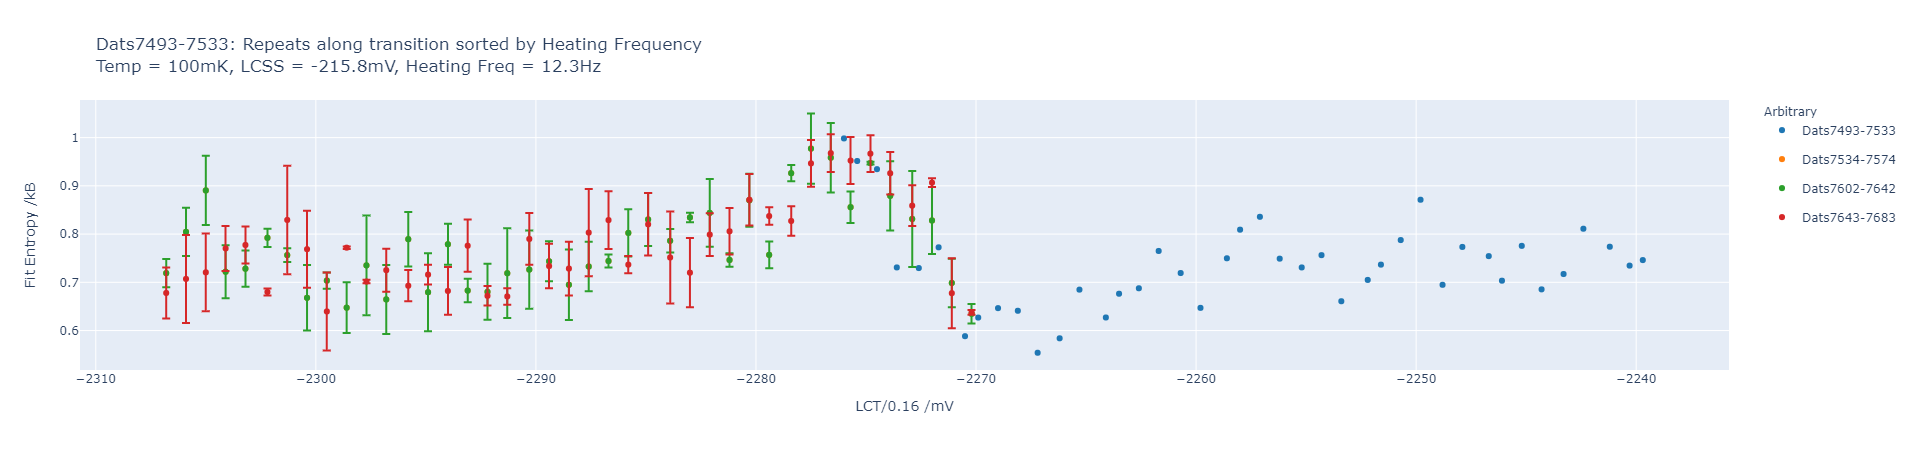

In [237]:
fig = figs[2]
fig2 = copy.copy(fig)

xs, datas = list(), list()
for data in fig.data:
    xs.append(data.x)
    datas.append(data.y)
xs = np.array(xs)
datas = np.array(datas)

xs = np.array([np.mean(xs[0:1], axis=0), np.mean(xs[2:3], axis=0)])
datas = np.array([np.mean(datas[0:1], axis=0), np.mean(datas[2:3], axis=0)])

bin_size=3
                  
for x, data, fd in zip(xs, datas, fig2.data):
    fd.x = x
    fd.y = data
    fd.error_y = dict()
fig2

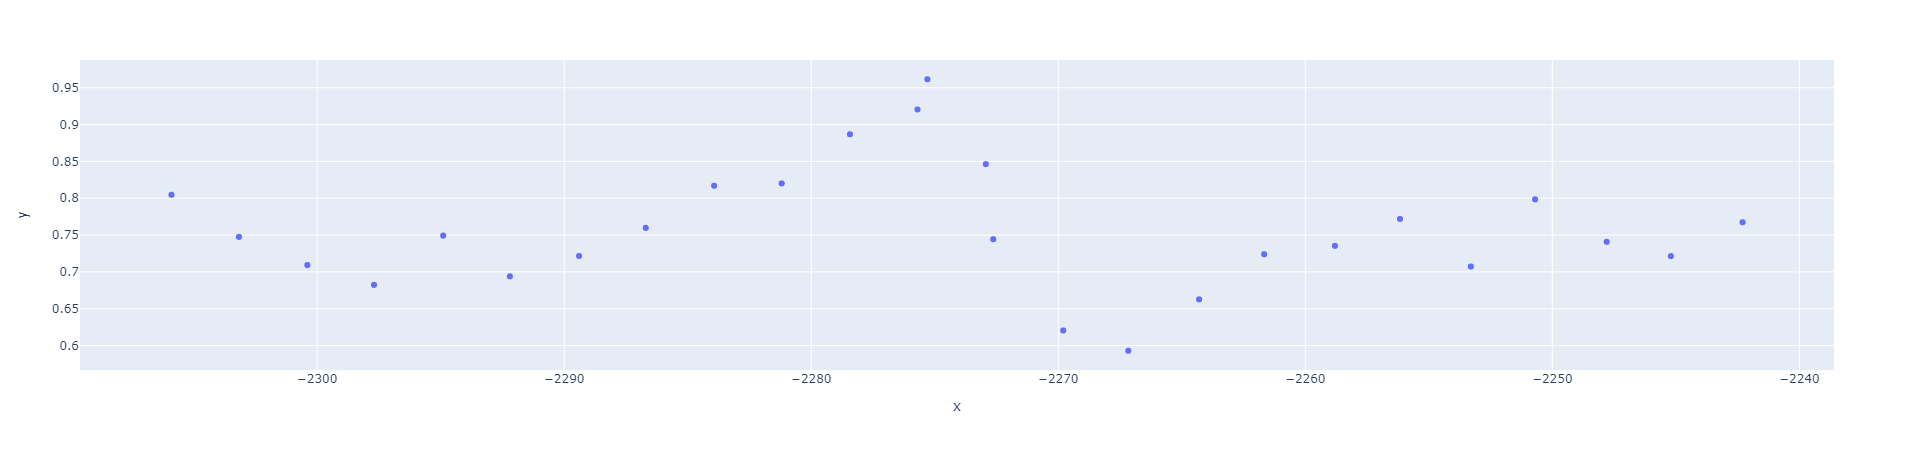

In [238]:
xs = CU.bin_data(xs, bin_size=bin_size)
datas = CU.bin_data(datas, bin_size=bin_size)

xs = np.array(list(xs[0])+list(xs[1]))
datas = np.array(list(datas[0])+list(datas[1]))

px.scatter(x=xs, y=datas)

In [227]:
datas

array([1.9330121, 1.6770227, 1.5295562, 1.4454374, 1.5660118, 1.5520096,
       1.6197584, 1.656806 , 1.6181514, 1.7516594, 1.7971184, 1.7932541,
       1.7234905], dtype=float32)

In [239]:

CU.save_to_mat([xs, datas], ['LCT', 'fit_entropy'], 'Temp/Binned fit entropy over S shape.mat')

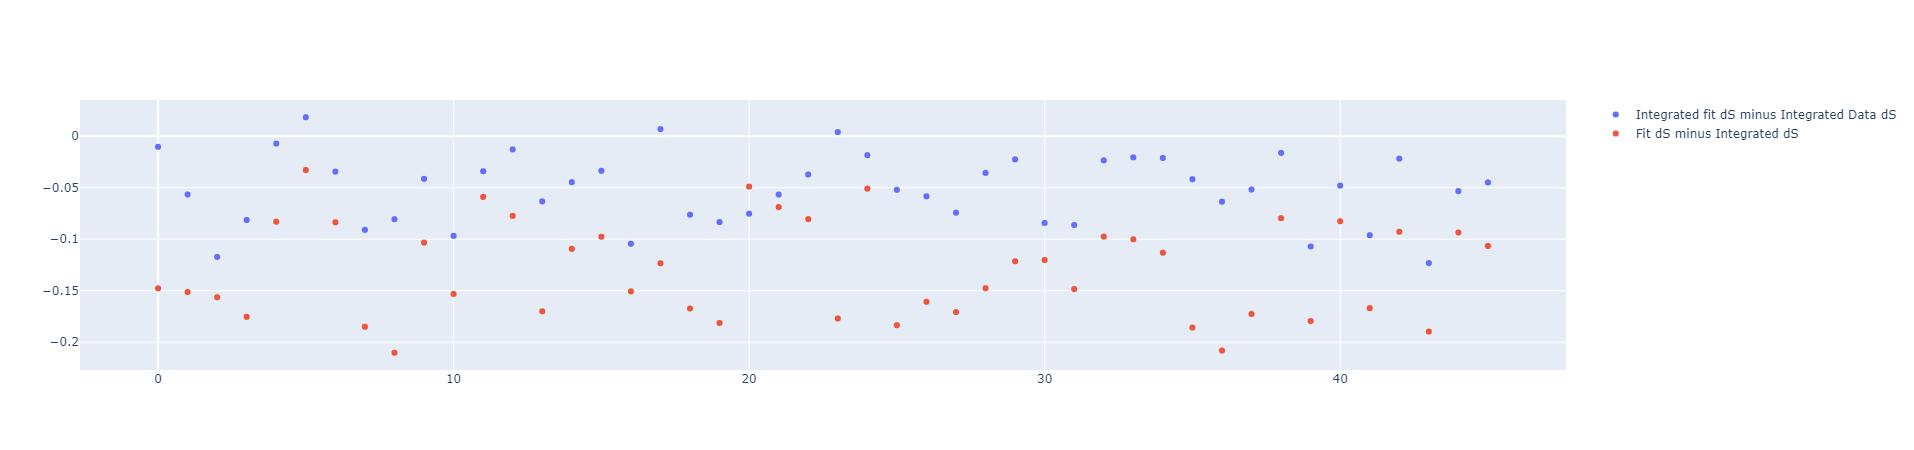

In [247]:
dat = dats[0]

fig = go.Figure()
diffs = list()
fminusint=list()
for dat in dats:
    
    data = EA.get_data(dat)
    values = dat.Other.EA_values

    int_fit = np.nancumsum(values.efit_info.eval_fit(data.x))*values.sf
    diffs.append(int_fit[-1] - data.integrated_data[-1])
    fminusint.append(values.dS - values.int_dS)

#     fig_i = go.Figure()
#     fig_i.add_trace(go.Scatter(mode='lines', x= data.x, y=int_fit, name='Integrated Fit'))
#     fig_i.add_trace(go.Scatter(mode='lines', x= data.x, y=data.integrated_data, name='Integrated Data'))
#     fig_i.show()

    
fig.add_trace(go.Scatter(mode='markers', x=list(range(len(dats))), y=diffs, name='Integrated fit dS minus Integrated Data dS'))
fig.add_trace(go.Scatter(mode='markers', x=list(range(len(dats))), y=fminusint, name = 'Fit dS minus Integrated dS'))




## Carefully calculate square wave info from data where theta is within 1sd of average only

In [3]:
dat = dats[0]

recalculate = True
if not hasattr(dat.Other, 'CarefulFit') or recalculate:
    data = EA.EA_data()
    info = EA.calculate_careful_fit(dat, thresh=1, param='theta')
    dat.Other.CarefulFit = info
    dat.Other.update_HDF()
    

EA.Plots.careful_fit(info)

C:\Users\Child\PythonVirtualEnv\PyDatAnalysis\lib\site-packages\scipy\stats\stats.py:2497: RuntimeWarning:

Mean of empty slice.

C:\Users\Child\PythonVirtualEnv\PyDatAnalysis\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Child\PythonVirtualEnv\PyDatAnalysis\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\Child\PythonVirtualEnv\PyDatAnalysis\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Child\PythonVirtualEnv\PyDatAnalysis\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Child\PythonVirtualEnv\PyDatAnalysis\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning:

Mean of empty slice.

C:\Users\Child\PythonVirtualEnv\PyDatAnalysis\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning:

invalid value encountered in 

AssertionError: 

## Calculate Average dT/amp from dats

In [145]:
filt_name = 'LCT/0.16'
filt_val = lambda dat: dat.Logs.fds['LCT/0.16']
filt_func = lambda dat: (filt_val(dat) < -2200)

temp_dats = [dat for dat in dats if filt_func(dat)]
temp_dats = CU.order_list(temp_dats, [filt_val(dat) for dat in temp_dats])

get_vals, names, units = list(), list(), list()

get_vals.append(lambda dat: dat.Other.EA_values.dT)
names.append('dT')
units.append('mV')

get_vals.append(lambda dat: dat.Other.EA_values.amp)
names.append('Amp')
units.append('nA')

get_vals.append(lambda dat: dat.Other.EA_values.tc)
names.append('Theta')
units.append('mV')



print(f'For dats{temp_dats[0].datnum}->{temp_dats[-1].datnum} ({filt_name}={filt_val(temp_dats[0]):.0f}->{filt_val(temp_dats[-1]):.0f}mV) avg:')
for get_val, name, unit in zip(get_vals, names, units):
    dts = [get_val(dat) for dat in temp_dats]
    print(f'\t {name} = {np.nanmean(dts):.3f}{unit}, stdev = {np.nanstd(dts):.3f}{unit}')

For dats7643->7574 (LCT/0.16=-2307->-2240mV) avg:
	 dT = 2.586mV, stdev = 0.123mV
	 Amp = 0.871nA, stdev = 0.014nA
	 Theta = 23.471mV, stdev = 1.069mV


In [192]:
val = -365/0.163
print(f'Closest DAC step below {val:.2f}mV = {val - val%20000/(2**16):.2f}mV')

Closest DAC step below -2239.26mV = -2239.53mV


In [204]:
nlcts = np.arange(-2276.34, -2239.53, 3*20000/(2**16), dtype=np.float64)
olcts = np.array([-371, -365])/0.163
olps = np.array([-439, -454.4])

nlps = np.interp(nlcts, olcts, olps)
print(f'Total of {len(nlcts)} positions:\n' \
    f'New LCTs/0.163 = {[round(v, 1) for v in nlcts]}\n' \
     f'New LPs*2 = {[round(v, 1) for v in nlps]}')

Total of 41 positions:
New LCTs/0.163 = [-2276.3, -2275.4, -2274.5, -2273.6, -2272.7, -2271.8, -2270.8, -2269.9, -2269.0, -2268.1, -2267.2, -2266.3, -2265.4, -2264.4, -2263.5, -2262.6, -2261.7, -2260.8, -2259.9, -2258.9, -2258.0, -2257.1, -2256.2, -2255.3, -2254.4, -2253.5, -2252.5, -2251.6, -2250.7, -2249.8, -2248.9, -2248.0, -2247.0, -2246.1, -2245.2, -2244.3, -2243.4, -2242.5, -2241.5, -2240.6, -2239.7]
New LPs*2 = [-439.0, -439.3, -439.7, -440.0, -440.4, -440.8, -441.2, -441.6, -442.0, -442.3, -442.7, -443.1, -443.5, -443.9, -444.3, -444.6, -445.0, -445.4, -445.8, -446.2, -446.5, -446.9, -447.3, -447.7, -448.1, -448.5, -448.8, -449.2, -449.6, -450.0, -450.4, -450.8, -451.1, -451.5, -451.9, -452.3, -452.7, -453.1, -453.4, -453.8, -454.2]
